In [ ]:
!pip install Minisom

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

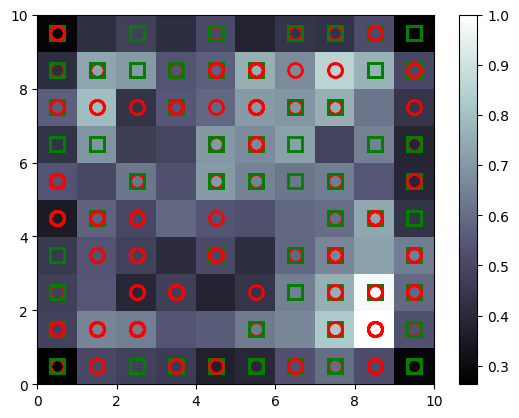

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o', 's']
colors=['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis=0)
frauds = sc.inverse_transform(frauds)

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15593345
15683168
15618410
15682860
15764226
15767231
15690492
15706464
15638871
15607746
15761047
15687527
15605276
15721569
15580366
15595010
15583552


In [ ]:
customers = dataset.iloc[:, 1:].values

In [ ]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)
import tensorflow as tf
tf.__version__


'2.19.0'

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
ann.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 100)

Epoch 1/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9721 - loss: 0.4652
Epoch 2/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.1843
Epoch 3/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9726 - loss: 0.1102
Epoch 4/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9793 - loss: 0.0664
Epoch 5/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9808 - loss: 0.0565
Epoch 6/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9751 - loss: 0.0576
Epoch 7/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9689 - loss: 0.0649
Epoch 8/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9737 - loss: 0.0519
Epoch 9/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9702 - loss: 0.0542
Epoch 10/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9767 - loss: 0.0456
Epoch 11/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9728 - loss: 0.0494
Epoch 12/100
690/690 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [ ]:
print(y_pred)

[[1.57523440e+07 1.91915294e-34]
 [1.56232100e+07 1.85296980e-32]
 [1.56114090e+07 5.26402122e-32]
 ...
 [1.56052760e+07 8.96454096e-01]
 [1.57672310e+07 8.96454096e-01]
 [1.56828600e+07 8.96454096e-01]]


In [ ]:
new_customer_raw = np.array([[15776156, 22.08, 11.460, 4, 4, 1.585, 0, 0, 0, 1, 2, 100, 1213, 0, 0]])
new_customer = sc.transform(new_customer_raw)
prob = ann.predict(new_customer)[0, 0]
threshold = 0.5
label = int(prob >= threshold)
print(f"Probabilidad de Fraude: {prob:.4f}")
print("Clasificacion: ", "FRAUDE" if label==1 else "NO FRAUDE")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Probabilidad de Fraude: 0.8965
Clasificacion:  FRAUDE
